In [1]:
%matplotlib inline

import sys 
sys.path.append("../")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from pgtaa.config import *

plt.style.use('bmh')

In [2]:
df = pd.read_csv(ENV_CSV, index_col=0, parse_dates=True)
train = pd.read_csv(TRAIN_CSV, index_col=0, parse_dates=True)
test = pd.read_csv(TEST_CSV, index_col=0, parse_dates=True)

assets = df.iloc[:,:8]
assets_train = train.iloc[:,:8]
assets_test = test.iloc[:,:8]

# compounded returns
assets = np.log(assets.pct_change(1) + 1)
assets_train = np.log(assets_train.pct_change(1) + 1)
assets_test = np.log(assets_test.pct_change(1) + 1)

display(pd.DataFrame({'Data shape': df.shape, 'Train set shape': train.shape, 'Test set shape': test.shape}, index=["rows", "columns"]))

,Data shape,Train set shape,Test set shape
rows,3471,3123,348
columns,32,32,32


In [3]:
with pd.option_context("display.max_rows", None):
    display(df.describe().loc[["mean", "std", "50%", "min", "max"]].T)

,mean,std,50%,min,max
iShares Russell 1000 Value ETF (IWD),71.990257,25.005903,62.476711,27.298498,129.238190
iShares Russell 1000 Growth ETF (IWF),69.221454,31.100386,55.094387,26.540808,156.360001
iShares Russell 2000 Growth ETF (IWO),101.905041,43.395189,85.262939,35.013786,220.032166
iShares Russell 2000 Value ETF (IWN),73.517636,25.693574,63.545822,26.122866,136.600082
iShares MSCI EAFE ETF (EFA),50.156782,9.821498,50.520603,23.790823,73.783981
iShares TIPS Bond ETF (TIP),94.471735,15.250725,102.693626,68.223198,113.035057
SPDR Gold Trust (GLD),108.433956,33.783928,115.790001,41.259998,184.589996
Vanguard REIT ETF (VNQ),50.896151,17.784314,47.277309,14.021532,83.592606
USD/EUR,1.282546,0.121900,1.293600,1.037500,1.601000
CNY/USD,6.832020,0.638801,6.686500,6.040200,8.276500


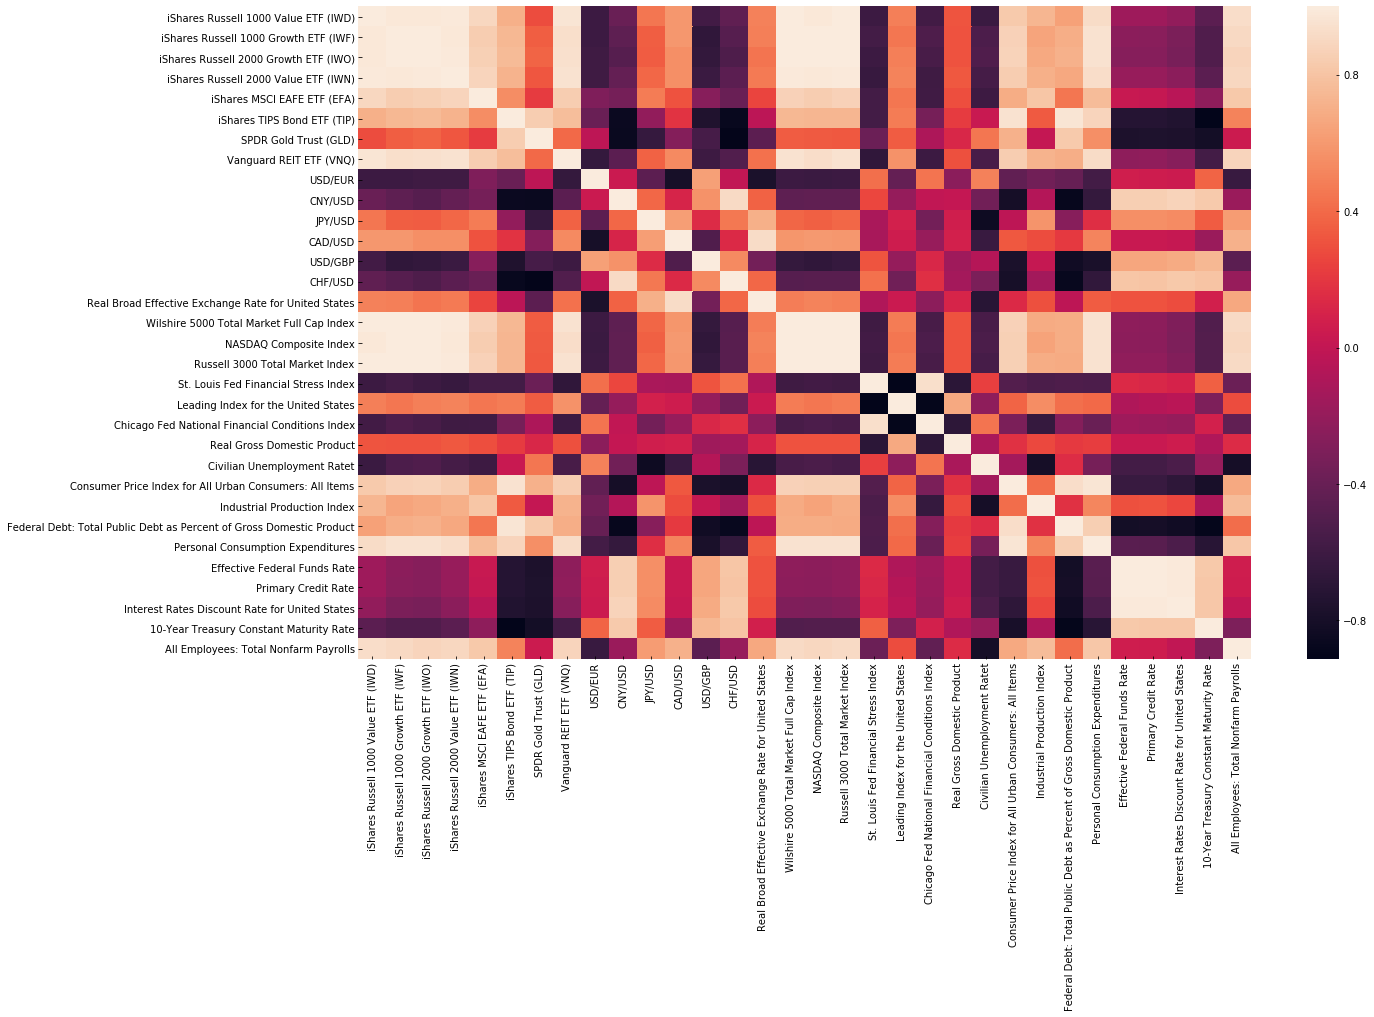

In [4]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), ax=ax)
plt.show()

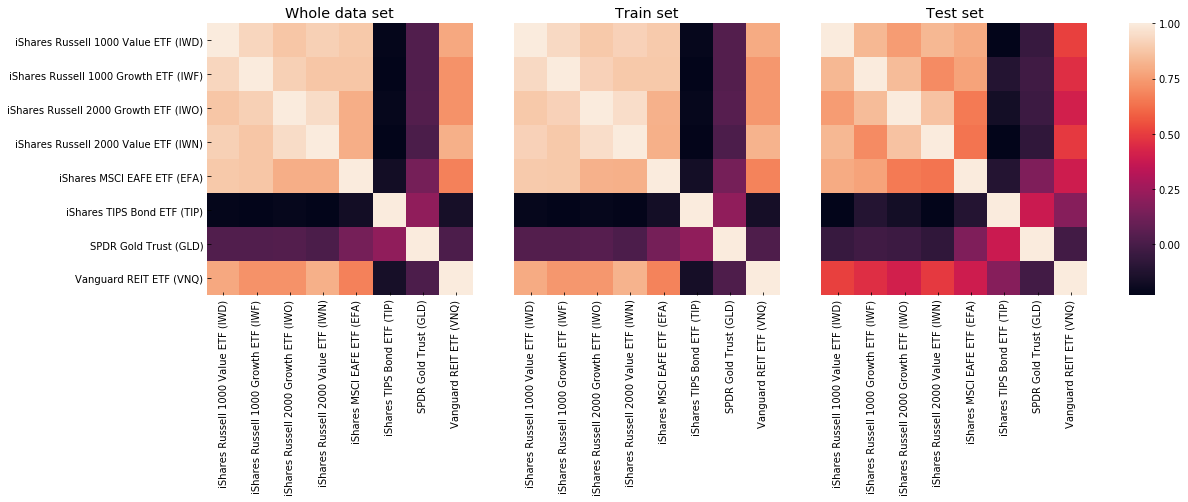

In [5]:
f,(ax1,ax2,ax3, axcb) = plt.subplots(1,4, figsize=(17,5),
            gridspec_kw={'width_ratios':[1,1,1,0.1]})
ax1.get_shared_y_axes().join(ax2,ax3)
g1 = sns.heatmap(assets.corr(),cbar=False,ax=ax1)
g1.set_title("Whole data set")
g1.set_ylabel('')
g1.set_xlabel('')
g2 = sns.heatmap(assets_train.corr(),cbar=False,ax=ax2)
g2.set_title("Train set")
g2.set_ylabel('')
g2.set_xlabel('')
g2.set_yticks([])
g3 = sns.heatmap(assets_test.corr(),ax=ax3, cbar_ax=axcb)
g3.set_title("Test set")
g3.set_ylabel('')
g3.set_xlabel('')
g3.set_yticks([])

# may be needed to rotate the ticklabels correctly:
for ax in [g1,g2,g3]:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=90)
    tly = ax.get_yticklabels()
    ax.set_yticklabels(tly, rotation=0)
plt.show()

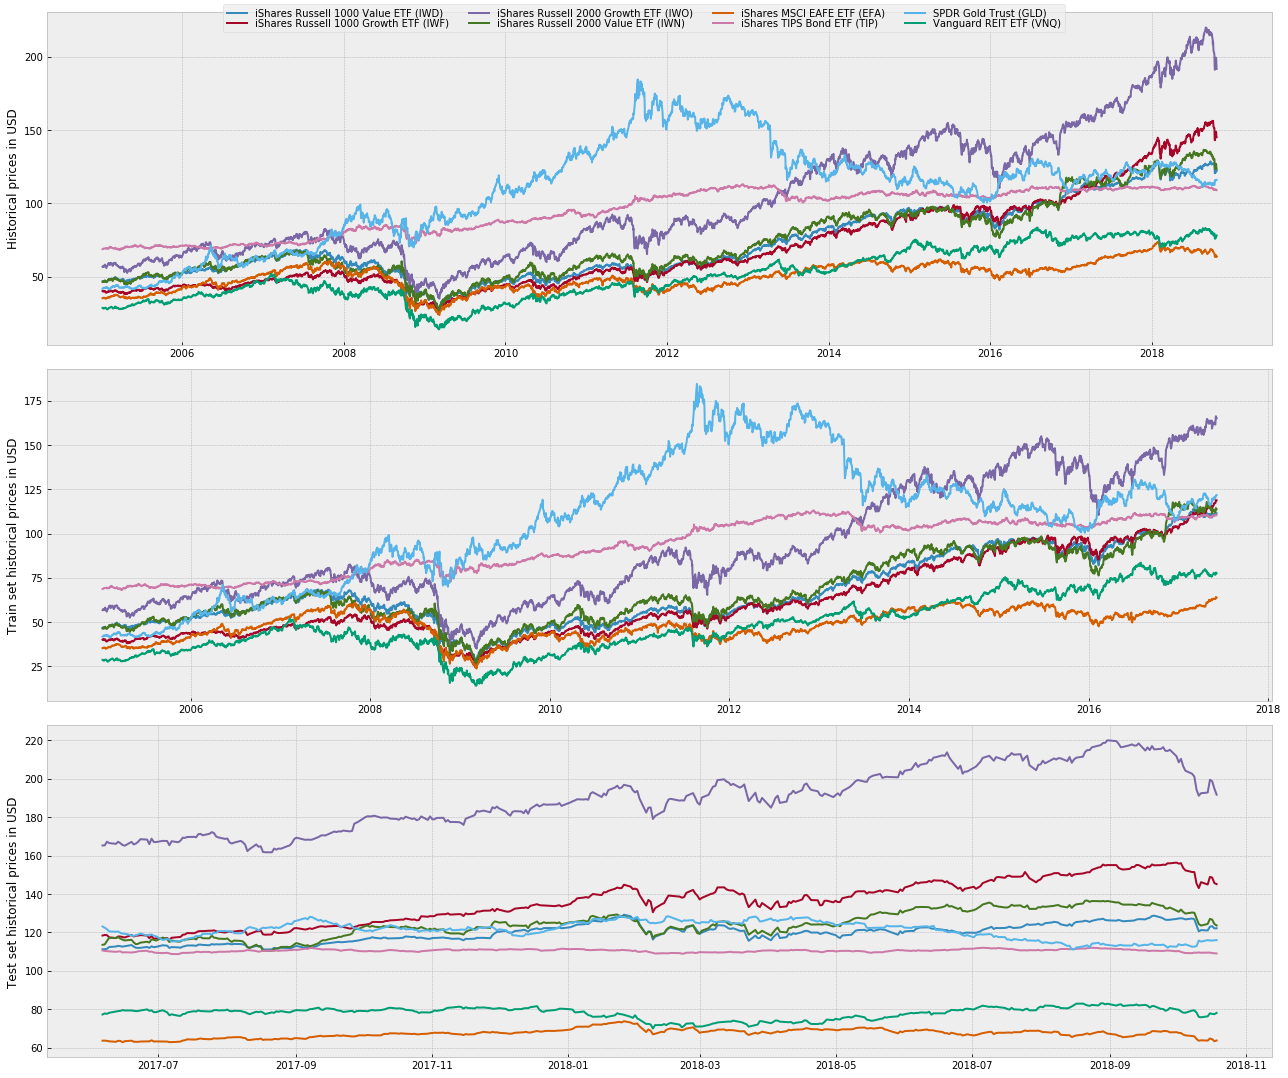

In [6]:
fig, axes = plt.subplots(3,1, sharex=False, figsize=(18,15))
l = axes[0].plot(df.iloc[:,:8])
axes[0].set_ylabel('Historical prices in USD')
axes[1].plot(train.iloc[:,:8])
axes[1].set_ylabel('Train set historical prices in USD')
axes[2].plot(test.iloc[:,:8])
axes[2].set_ylabel('Test set historical prices in USD')
plt.figlegend(l, ASSET_NAMES, loc="upper center", ncol=4, labelspacing=0.)
plt.tight_layout()
plt.show()

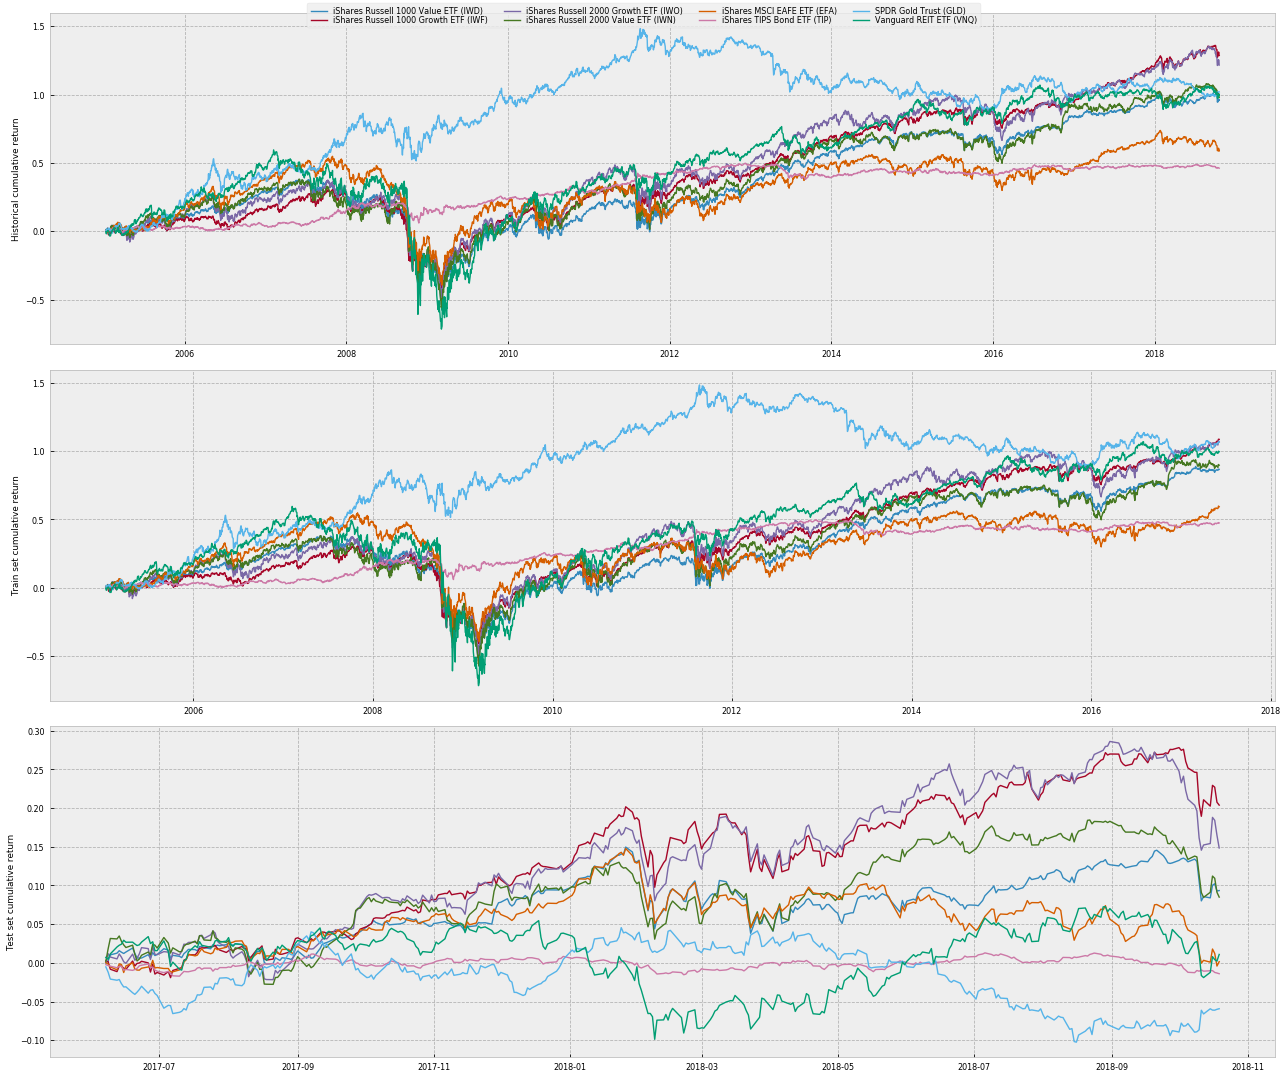

In [7]:
plt.style.use('seaborn-paper')
fig, axes = plt.subplots(3,1, sharex=False, figsize=(18,15))
l = axes[0].plot(assets.cumsum())
axes[0].set_ylabel('Historical cumulative return')
axes[1].plot(assets_train.cumsum())
axes[1].set_ylabel('Train set cumulative return')
axes[2].plot(assets_test.cumsum())
axes[2].set_ylabel('Test set cumulative return')
plt.figlegend(l, ASSET_NAMES, loc="upper center", ncol=4, labelspacing=0.)
plt.tight_layout()
plt.show()

In [3]:
train.iloc[:,:8] = train.iloc[:,:8].pct_change(1)
test.iloc[:,:8] = test.iloc[:,:8].pct_change(1)
train.dropna(inplace=True)
test.dropna(inplace=True)

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(train)
t = scaler.transform(train)
s = scaler.transform(test)

In [144]:
class PortfolioInit(object):
    def __init__(self,
                 data: np.ndarray,
                 nb_assets: int,
                 horizon: int,
                 episodes: int,
                 window_size: int,
                 epochs: int = 1,
                 risk_aversion: float=1.0,
                 val_eps: int=None
                 ):
        """
        :param data: evaluation dataframe
        :param episodes: number of training/testing episodes
        :param epochs: number of training epochs, if testing epochs=1
        :param window: evaluation window (number of previous days + current day)
        :param val_eps: number of validation episodes, if testing val_eps=None
        """
        self.data = data
        self.assets = data[:, :8]
        self.episodes = episodes
        self.epochs = epochs
        self.horizon = horizon
        self.window_size = window_size
        self.nb_assets = nb_assets
        self.risk_aversion = risk_aversion

        # random permutation of episode starting point
        episode_starts = np.random.permutation(range(self.window_size, len(data) - self.horizon))
        self.episode_starts = episode_starts[:episodes]
        self.windows, self.init_weights, self.preds = self._get_windows(*self._build_windows())

        #self.val_window = self.episode_window[self.episodes:]
        #self.episode_window = self.episode_window[:self.episodes]

    def _get_windows(self, window, weights, pred):
        epoch_permutations = [np.random.permutation(self.episodes) for _ in range(self.epochs)]
        windows = []
        init_weights = []
        preds = []
        for i in range(self.epochs):
            windows.append(window[epoch_permutations[i]])
            init_weights.append(weights[epoch_permutations[i]])
            #preds.append(pred[epoch_permutations[i]])
        # windows has the shape (epochs, nb_epsides, horizon, window_size, columns)     4D
        # init_weights has the shape (epochs, nb_episodes, columns)                     2D
        # preds has the shape (epochs, nb_episodes, horizon, columns)                   3D
        return np.array(windows), np.array(init_weights), np.array(preds)

    def _build_windows(self):
        # each window has horizon times subwindows
        w_episodes = []
        init_weights = []
        predictions = []
        for episode in self.episode_starts:
            ws = []
            assets = self.assets[episode - self.window_size: episode]
            weight = WeightOptimize(covariance_matrix=np.cov(assets.T), asset_returns=assets, risk_aversion=self.risk_aversion).optimize_weights()
            for s in range(self.horizon):
                ws.append(self.data[episode - self.window_size + s : episode + s])
            # TODO: Add model predictions
            w_episodes.append(ws)
            init_weights.append(weight)
        # w_episodes has the shape (nb_epsides, horizon, window_size, columns)  4D
        # init_weights has the shape (nb_episodes, columns)                     2D
        # predictions has the shape (nb_episodes, horizon, columns)             3D
        return np.array(w_episodes), np.array(init_weights), np.array(predictions)

In [145]:
p = PortfolioInit(train.values, episodes=100, nb_assets=8, horizon=30, epochs=50, window_size=100)

In [147]:
p.windows.shape, p.init_weights.shape

((50, 100, 30, 100, 32), (50, 100, 8))

In [130]:
p.init_weights[np.random.permutation(100)].shape

(100, 8)

In [149]:
%prun PortfolioInit(train.values, episodes=100, nb_assets=8, horizon=30, epochs=50, window_size=100)

         283892 function calls (272325 primitive calls) in 20.867 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    15642   16.912    0.001   16.912    0.001 {built-in method numpy.core.multiarray.array}
        1    2.482    2.482   19.323   19.323 <ipython-input-144-3515dede494a>:36(_get_windows)
        1    0.684    0.684   20.500   20.500 <ipython-input-144-3515dede494a>:2(__init__)
        1    0.363    0.363   20.867   20.867 <string>:1(<module>)
     2570    0.120    0.000    0.270    0.000 slsqp.py:31(approx_jacobian)
      100    0.055    0.001    0.411    0.004 slsqp.py:215(_minimize_slsqp)
    13350    0.038    0.000    0.038    0.000 {method 'reduce' of 'numpy.ufunc' objects}
    38550    0.032    0.000    0.032    0.000 {built-in method numpy.core.multiarray.matmul}
    12850    0.025    0.000    0.057    0.000 optimize.py:25(objective_function)
    12950    0.016    0.000    0.053    0.000 fromnumeric.py:64